Exploratory Data Analysis

In [2]:
#Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import ast
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Filter for US Data Analyst Roles

In [9]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_plot= df_DA_US['job_location'].value_counts().head(10).to_frame() #creating a visualization of top 10 job locations
df_plot


,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


Creating Bar Plot to Visualize Top Job Locations

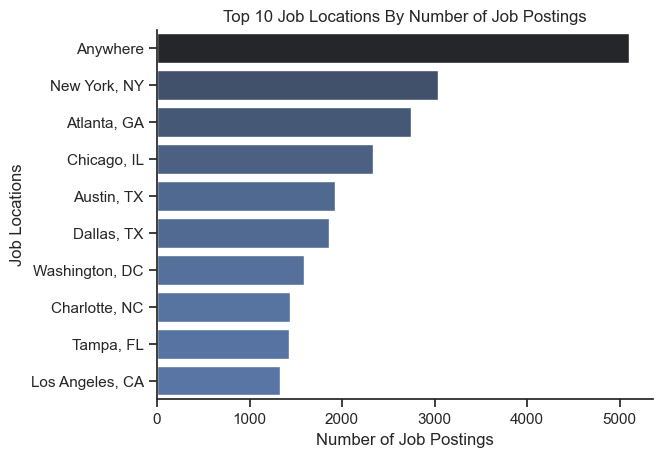

In [10]:
sns.set_theme(style='ticks') #dims color to make it more paleatable 
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False) #hue creates gradient based on number of counts
sns.despine() #removes top and right spines from plot
plt.title('Top 10 Job Locations By Number of Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Locations')
plt.show()


Pie Charts for Job Specifications

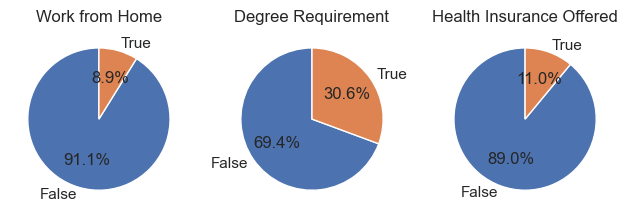

In [11]:
fig, ax = plt.subplots(1,3)
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered' #dictionary of columns in df to titles for each corresponding pie chart
}

for i, (column, title) in enumerate(dict_column.items()): #loop through each column and title in dictionary
   ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
   ax[i].set_title(title)
   
fig.tight_layout()   
plt.show()


Top Companies for US Data Analysts

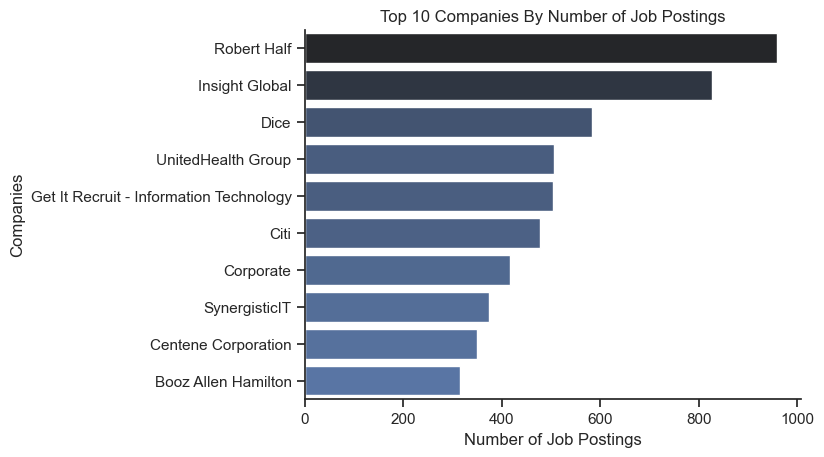

In [13]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame() #creating a df to plot top 10 companies

sns.set_theme(style='ticks') #dims color to make it more paleatable 
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False) #hue creates gradient based on number of counts
sns.despine() #removes top and right spines from plot
plt.title('Top 10 Companies By Number of Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Companies')
plt.show()